### 목표
- 10종류의 패션 이미지 데이터를 분류하는 신경망 모델을 만들어보자

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# keras에서 지원하는 딥러닝 학습용 손글씨 이미지 데이터 임포트
from tensorflow.keras.datasets import fashion_mnist

In [131]:
data = fashion_mnist.load_data()

In [132]:
len(data)

2

In [133]:
(X_train, y_train), (X_test, y_test) =data

In [134]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


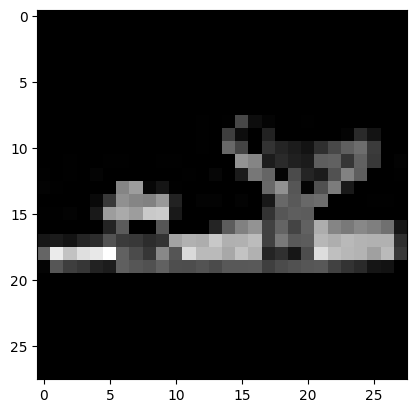

In [135]:
plt.imshow(X_train[59999], cmap='gray')

In [136]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [137]:
pd.get_dummies(y_train)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,1,0,0,0,0
59996,0,1,0,0,0,0,0,0,0,0
59997,0,0,0,1,0,0,0,0,0,0
59998,1,0,0,0,0,0,0,0,0,0


In [138]:
from tensorflow.keras.utils import to_categorical

In [139]:
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [140]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [141]:
y_train_one_hot.shape, y_test_one_hot.shape

((60000, 10), (10000, 10))

In [142]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [143]:
# ### 직접 진행해보기!
# 1. 신경망 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)\mo
# 신경망에 들어가기 전 Flatten을 통해 데이터를 1차원으로 펴주기
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(500,  activation = 'sigmoid'))
model.add(Dense(300,  activation = 'sigmoid'))
model.add(Dense(50,  activation = 'sigmoid'))
model.add(Dense(10,  activation = 'softmax'))

model.summary()


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_111 (Dense)           (None, 500)               392500    
                                                                 
 dense_112 (Dense)           (None, 300)               150300    
                                                                 
 dense_113 (Dense)           (None, 50)                15050     
                                                                 
 dense_114 (Dense)           (None, 10)                510       
                                                                 
Total params: 558,360
Trainable params: 558,360
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.compile(loss= 'categorical_crossentropy',
              optimizer= 'Adam', # 최적화함수 : 확률적 경사강하법(SGD) 활용
              metrics=['acc']  # metrics : 평가방법을 설정(분류 문제이므로 정확도 출력 필요)
              )

In [145]:
h = model.fit(X_train, y_train_one_hot, epochs=30,
              batch_size=128, # 한 번에 학습되는 데이터의 개수 (기본값은 32개)
              validation_data=(X_val, y_val_one_hot)
              )

Epoch 1/30
469/469 [==============================] - 4s 5ms/step - loss: 0.9119 - acc: 0.6892 - val_loss: 0.7048 - val_acc: 0.7387
Epoch 2/30
469/469 [==============================] - 3s 5ms/step - loss: 0.6951 - acc: 0.7340 - val_loss: 0.6770 - val_acc: 0.7493
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.6740 - acc: 0.7407 - val_loss: 0.6684 - val_acc: 0.7457
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.6613 - acc: 0.7450 - val_loss: 0.6991 - val_acc: 0.7295
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.6532 - acc: 0.7525 - val_loss: 0.6497 - val_acc: 0.7459
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.6415 - acc: 0.7523 - val_loss: 0.6384 - val_acc: 0.7589
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.6345 - acc: 0.7538 - val_loss: 0.6351 - val_acc: 0.7613
Epoch 8/30
469/469 [==============================] - 2s 5ms/step - loss: 0.

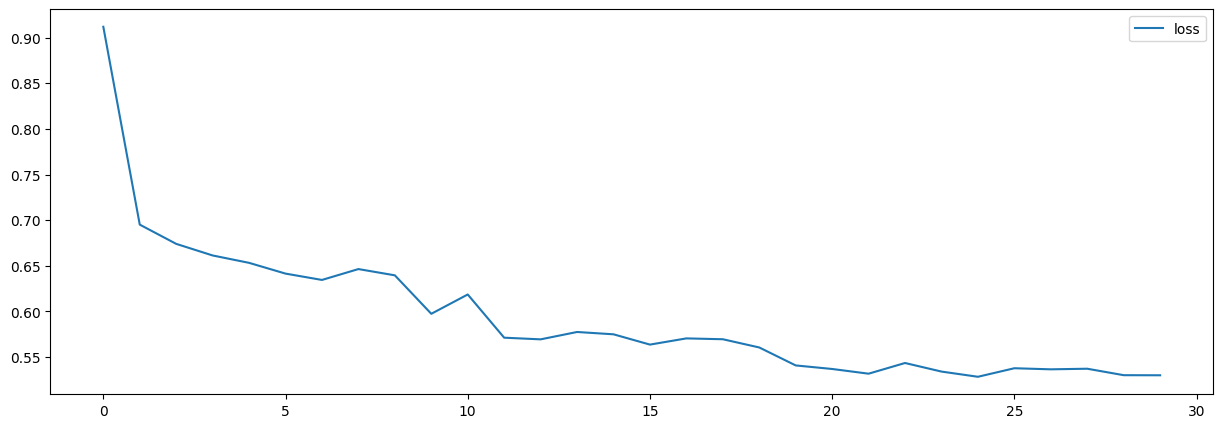

In [146]:
# 3. 시각화
plt.figure(figsize=(15,5))

plt.plot(h.history['loss'], label='loss')

plt.legend()
plt.show()

In [147]:
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.5406 - acc: 0.8075


[0.540615439414978, 0.8075000047683716]

앞선 손글씨 이미지 데이터와 동일한 형태의 데이터를 동일한 구조로 학습시켰지만 정확도가 차이나는 이유는 패션이미지 데이터의 복잡도가 더 높았기 때문

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_val, y_train, y_val_one_hot = train_test_split(X_train, y_train_one_hot,
                                                          random_state=33)

In [150]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val_one_hot.shape)

(45000, 28, 28)
(15000, 28, 28)
(45000, 10)
(15000, 10)


In [151]:
X_train.shape, y_train_one_hot.shape

((45000, 28, 28), (60000, 10))

### 활성화 함수, 최적화함수 별 비교
- 1. 중간층 활성화함수 : sigmoid, 최적화함수 : SGD
- 2. 중간층 활성화함수 : relu, 최적화함수 : SGD
- 3. 중간층 활성화함수 : relu, 최적화함수 : Adam
  - 각각의 신경망을 설계하고 결과를 비교해보세요

In [152]:
# ### 직접 진행해보기!
# 1. 신경망 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)\mo
# 신경망에 들어가기 전 Flatten을 통해 데이터를 1차원으로 펴주기
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(500,  activation = 'sigmoid'))
model.add(Dense(300,  activation = 'sigmoid'))
model.add(Dense(50,  activation = 'sigmoid'))
model.add(Dense(10,  activation = 'softmax'))

model.summary()

# 2. 학습 및 평가방법 설정
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['acc'])

h = model.fit(X_train, y_train, epochs=30,
              batch_size=128, # 한 번에 학습되는 데이터의 개수 (기본값은 32개)
              validation_data=(X_val, y_val_one_hot)
              )


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_115 (Dense)           (None, 500)               392500    
                                                                 
 dense_116 (Dense)           (None, 300)               150300    
                                                                 
 dense_117 (Dense)           (None, 50)                15050     
                                                                 
 dense_118 (Dense)           (None, 10)                510       
                                                                 
Total params: 558,360
Trainable params: 558,360
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
352/352 [===========================

In [153]:
# SGD의 학습률(leaning rate)을 줄여서 좀 더 안정적이고 정확하게 학습시켜보자
from tensorflow.keras.optimizers import SGD

In [154]:
# ### 직접 진행해보기!
# 1. 신경망 구조 설계
model1 = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)\mo
# 신경망에 들어가기 전 Flatten을 통해 데이터를 1차원으로 펴주기
model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(500,  activation = 'relu'))
model1.add(Dense(300,  activation = 'relu'))
model1.add(Dense(50,  activation = 'relu'))
model1.add(Dense(10,  activation = 'softmax'))

model1.summary()

# 2. 학습 및 평가방법 설정
model1.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001), # SGD의 lr 디폴트값 : 0.01
               metrics=['acc'])

h1 = model1.fit(X_train, y_train, epochs=30,
              batch_size=128, # 한 번에 학습되는 데이터의 개수 (기본값은 32개)
              validation_data=(X_val, y_val_one_hot)
              )


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 784)               0         
                                                                 
 dense_119 (Dense)           (None, 500)               392500    
                                                                 
 dense_120 (Dense)           (None, 300)               150300    
                                                                 
 dense_121 (Dense)           (None, 50)                15050     
                                                                 
 dense_122 (Dense)           (None, 10)                510       
                                                                 
Total params: 558,360
Trainable params: 558,360
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
352/352 [===========================

In [155]:
# ### 직접 진행해보기!
# 1. 신경망 구조 설계
model2 = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)\mo
# 신경망에 들어가기 전 Flatten을 통해 데이터를 1차원으로 펴주기
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(500,  activation = 'relu'))
model2.add(Dense(300,  activation = 'relu'))
model2.add(Dense(50,  activation = 'relu'))
model2.add(Dense(10,  activation = 'softmax'))

model2.summary()

# 2. 학습 및 평가방법 설정
model2.compile(loss='categorical_crossentropy',  optimizer=SGD(learning_rate=0.001), metrics=['acc'])

h2 = model2.fit(X_train, y_train, epochs=30,
              batch_size=128, # 한 번에 학습되는 데이터의 개수 (기본값은 32개)
              validation_data=(X_val, y_val_one_hot)
              )

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 784)               0         
                                                                 
 dense_123 (Dense)           (None, 500)               392500    
                                                                 
 dense_124 (Dense)           (None, 300)               150300    
                                                                 
 dense_125 (Dense)           (None, 50)                15050     
                                                                 
 dense_126 (Dense)           (None, 10)                510       
                                                                 
Total params: 558,360
Trainable params: 558,360
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
352/352 [===========================

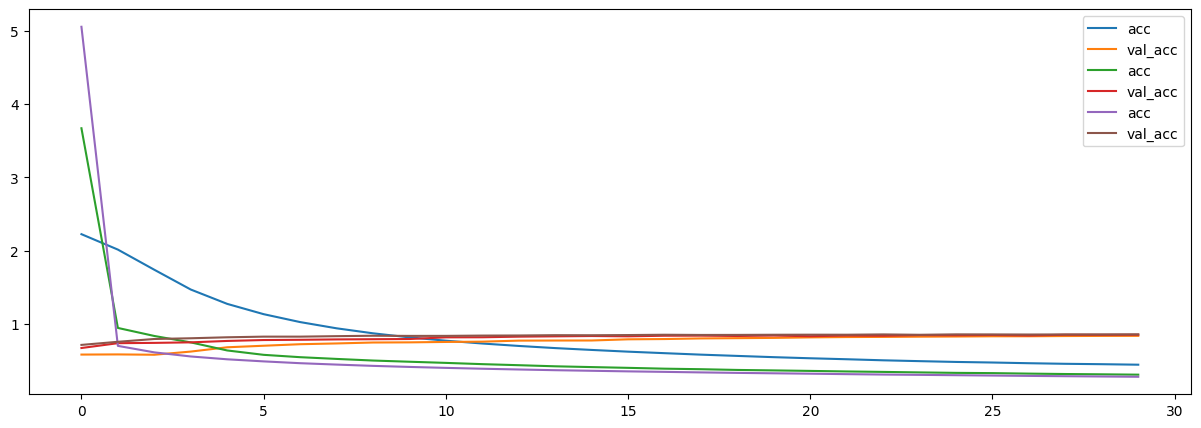

In [156]:
plt.figure(figsize=(15,5))

# sigmoid, SGD 사용한 모델
plt.plot(h.history['loss'], label='acc')
plt.plot(h.history['val_acc'], label='val_acc')

# relu, SGD 사용한 모델
plt.plot(h1.history['loss'], label='acc')
plt.plot(h1.history['val_acc'], label='val_acc')

# relu, Adam 사용한 모델
plt.plot(h2.history['loss'], label='acc')
plt.plot(h2.history['val_acc'], label='val_acc')

plt.legend()
plt.show()

### 최적화 모델 찾기
- 모델체크포인트 : 모델 저장
- 얼리스탑핑 : 조기학습중단(과대적합, 시간낭비 방지)

In [161]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [162]:
# 1. 모델 저장
# 저장 경로 및 파일명 형태 설정
save_path = '/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/model/FashionModel_{epoch:03d}_{val_acc:.4f}.hdf5'
# d : 10진수 형태, 03 -> 0이 3개 붙어있는 형태의 자리수 (001, 002, 003, ...)
# f : 소수점 형태, .4 -> 소수점 4자리까지 형태의 자리수 (0.0001, 0.0002, 0.0003, ...)
# hdf5 : 저장되는 모델의 파일의 확장자

f_mckp = ModelCheckpoint(filepath = save_path,  # 파일 경로
                         monitor = 'val_acc',   # 해당 값을 기준으로 파일을 저장할지 결정
                         save_best_only = True, # monitor값이 가장 최고점 혹은 최저점을 갱신했을 경우 모델을 저장
                         mode = 'max',          # save_best_only가 True일 경우 갱신 값의 최대,최소를 결정(디폴드가 max)
                         verbose = 1            # 모델 개선 및 저장 메시지를 출력
                         )

In [163]:
# 2. 학습 조기 중단
f_early = EarlyStopping(monitor = 'val_acc',
                        patience = 5 # monitor의 값 개선을 몇 번이나 기다려줄지를 결정
                        )

# -> 모델 학습 시 val_acc가 5번의 epoch를 돌 동안 개선되지 않으면 학습을 중단시켜주세요~!

In [164]:
# ### 직접 진행해보기!
# 1. 신경망 구조 설계
model3 = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)\mo
# 신경망에 들어가기 전 Flatten을 통해 데이터를 1차원으로 펴주기
model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(500,  activation = 'relu'))
model3.add(Dense(300,  activation = 'relu'))
model3.add(Dense(50,  activation = 'relu'))
model3.add(Dense(10,  activation = 'softmax'))

model3.summary()

# 2. 학습 및 평가방법 설정
model3.compile(loss='categorical_crossentropy',  optimizer=SGD(learning_rate=0.001), metrics=['acc'])

h3 = model3.fit(X_train, y_train_one_hot, epochs=30,
              batch_size=128, # 한 번에 학습되는 데이터의 개수 (기본값은 32개)
              validation_split = 0.2,
              callbacks=(f_mckp, f_early)
              )

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 784)               0         
                                                                 
 dense_127 (Dense)           (None, 500)               392500    
                                                                 
 dense_128 (Dense)           (None, 300)               150300    
                                                                 
 dense_129 (Dense)           (None, 50)                15050     
                                                                 
 dense_130 (Dense)           (None, 10)                510       
                                                                 
Total params: 558,360
Trainable params: 558,360
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
278/282 [===========================

In [160]:
from tensorflow.keras.models import load_model

In [167]:
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/model/FashionModel_001_0.0996.hdf5')

In [169]:
best_model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 2.3065 - acc: 0.1015


[2.30646014213562, 0.1014999970793724]